In [ ]:
# STEP 1 — IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Make plots look nice
sns.set(style="whitegrid")

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [ ]:
# STEP 2 — LOAD DATASETS
df_crashes = pd.read_csv("/content/Motor_Vehicle_Collisions_-_Crashes_20251111.csv", low_memory=False)
df_persons = pd.read_csv("/content/Motor_Vehicle_Collisions_-_Person_20251111.csv", low_memory=False)

# Preview
print("Crashes dataset shape:", df_crashes.shape)
print("Persons dataset shape:", df_persons.shape)

df_crashes.head()


Crashes dataset shape: (285893, 29)
Persons dataset shape: (333577, 21)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765.0,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547.0,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373.0,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903.0,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131.0,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [ ]:
# STEP 3 — BASIC INFO
df_crashes.info()
df_crashes.describe()

# Check missing values
df_crashes.isna().sum().sort_values(ascending=False).head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285893 entries, 0 to 285892
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE                     285893 non-null  object 
 1   CRASH TIME                     285893 non-null  object 
 2   BOROUGH                        190302 non-null  object 
 3   ZIP CODE                       190264 non-null  float64
 4   LATITUDE                       262791 non-null  float64
 5   LONGITUDE                      262791 non-null  float64
 6   LOCATION                       262791 non-null  object 
 7   ON STREET NAME                 207930 non-null  object 
 8   CROSS STREET NAME              135214 non-null  object 
 9   OFF STREET NAME                77959 non-null   object 
 10  NUMBER OF PERSONS INJURED      285893 non-null  int64  
 11  NUMBER OF PERSONS KILLED       285893 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED 

,0
VEHICLE TYPE CODE 5,283778
CONTRIBUTING FACTOR VEHICLE 5,283684
VEHICLE TYPE CODE 4,278969
CONTRIBUTING FACTOR VEHICLE 4,278562
VEHICLE TYPE CODE 3,260328
CONTRIBUTING FACTOR VEHICLE 3,258325
OFF STREET NAME,207934
CROSS STREET NAME,150679
ZIP CODE,95629
VEHICLE TYPE CODE 2,95622


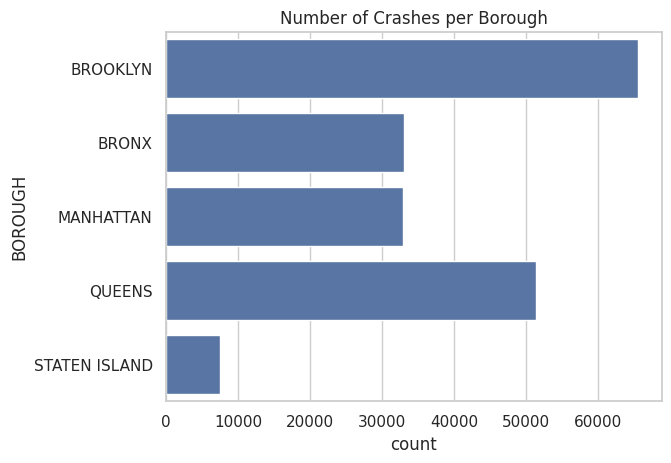

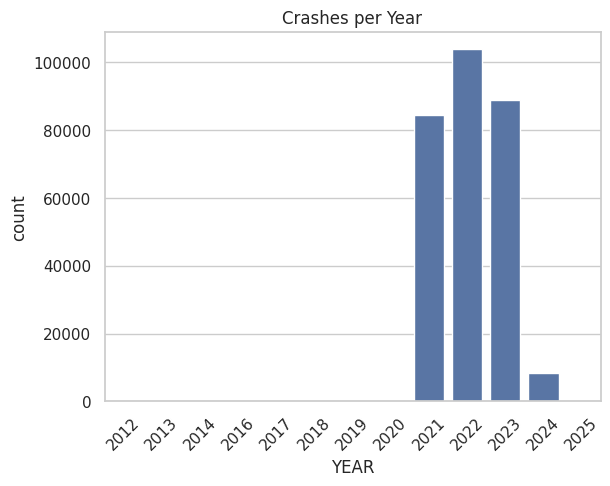

In [ ]:
# Crash counts per Borough
sns.countplot(y='BOROUGH', data=df_crashes)
plt.title("Number of Crashes per Borough")
plt.show()

# Crashes over years
df_crashes['CRASH DATE'] = pd.to_datetime(df_crashes['CRASH DATE'], errors='coerce')
df_crashes['YEAR'] = df_crashes['CRASH DATE'].dt.year
sns.countplot(x='YEAR', data=df_crashes)
plt.title("Crashes per Year")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Drop rows missing essential info
df_crashes.dropna(subset=['COLLISION_ID', 'CRASH DATE', 'LATITUDE', 'LONGITUDE'], inplace=True)

# Fill missing boroughs with 'UNKNOWN'
df_crashes['BOROUGH'].fillna('UNKNOWN', inplace=True)

# Remove duplicates
df_crashes.drop_duplicates(inplace=True)

# Fix data types
df_crashes['CRASH DATE'] = pd.to_datetime(df_crashes['CRASH DATE'], errors='coerce')


/tmp/ipython-input-3695905881.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_crashes['BOROUGH'].fillna('UNKNOWN', inplace=True)


In [ ]:
df_persons.dropna(subset=['COLLISION_ID'], inplace=True)
df_persons.drop_duplicates(inplace=True)
df_persons['PERSON_AGE'] = pd.to_numeric(df_persons['PERSON_AGE'], errors='coerce')


In [ ]:
# STEP 5 — INTEGRATION
df_merged = pd.merge(df_crashes, df_persons, on='COLLISION_ID', how='inner')
print("Merged shape:", df_merged.shape)
df_merged.head()


Merged shape: (1006, 50)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,2022-03-28,7:40,UNKNOWN,NaN,40.740467,-73.972950,"(40.740467, -73.97295)",FDR DRIVE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,F
1,2021-09-27,12:38,BROOKLYN,11207.0,40.687461,-73.906488,"(40.6874614, -73.9064878)",CENTRAL AVENUE,MOFFAT STREET,NaN,...,Does Not Apply,Driver,Lap Belt,NaN,NaN,Does Not Apply,Driver,NaN,NaN,F
2,2021-09-27,12:38,BROOKLYN,11207.0,40.687461,-73.906488,"(40.6874614, -73.9064878)",CENTRAL AVENUE,MOFFAT STREET,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,F
3,2021-06-01,16:45,UNKNOWN,NaN,40.714071,-73.954340,"(40.7140707, -73.9543399)",METROPOLITAN AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,NaN
4,2022-03-30,23:30,MANHATTAN,10012.0,40.724136,-73.992615,"(40.724136, -73.992615)",EAST HOUSTON STREET,BOWERY,NaN,...,Does Not Apply,Driver,Lap Belt,NaN,NaN,Does Not Apply,Driver,NaN,NaN,M


In [ ]:
# Remove redundant columns
df_merged.drop(columns=['ZIP_CODE', 'LOCATION'], errors='ignore', inplace=True)

# Handle new missing values
df_merged.fillna({'BOROUGH': 'UNKNOWN', 'PERSON_TYPE': 'UNKNOWN'}, inplace=True)


In [ ]:
# Injuries per Borough
injuries = df_merged.groupby('BOROUGH')['NUMBER OF PERSONS INJURED'].sum().reset_index()
px.bar(injuries, x='BOROUGH', y='NUMBER OF PERSONS INJURED', title='Total Injuries per Borough')


In [ ]:
# Fatalities by Year
fatalities = df_merged.groupby('YEAR')['NUMBER OF PERSONS KILLED'].sum().reset_index()
px.line(fatalities, x='YEAR', y='NUMBER OF PERSONS KILLED', title='Fatalities Over Time')


In [ ]:
#Building the Dashboard
!pip install dash

from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)

app.layout = html.Div([
    html.H1("NYC Motor Vehicle Collisions Dashboard"),
    dcc.Dropdown(df_merged['BOROUGH'].unique(), 'BROOKLYN', id='borough-filter'),
    dcc.Graph(id='injuries-plot')
])

@app.callback(
    Output('injuries-plot', 'figure'),
    Input('borough-filter', 'value')
)
def update_chart(borough):
    filtered = df_merged[df_merged['BOROUGH'] == borough]
    fig = px.histogram(filtered, x='YEAR', y='NUMBER OF PERSONS INJURED', histfunc='sum',
                       title=f"Injuries in {borough} Over Years")
    return fig

app.run(mode='inline')


<IPython.core.display.Javascript object>

In [ ]:
# ✅ Step 11 — Create dashboard.py file for deployment

dashboard_code = '''
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Load the cleaned merged dataset
df = pd.read_csv("merged_collisions.csv")

# Make sure date column is properly formatted
if "CRASH_DATE" in df.columns:
    df["CRASH_DATE"] = pd.to_datetime(df["CRASH_DATE"], errors="coerce")
    df["YEAR"] = df["CRASH_DATE"].dt.year

# Initialize Dash app
app = Dash(__name__)
server = app.server  # required for Render/Heroku

# Layout
app.layout = html.Div([
    html.H1("🚗 NYC Motor Vehicle Collisions Dashboard", style={"textAlign": "center"}),

    html.Div([
        html.Label("Select Borough:"),
        dcc.Dropdown(
            options=[{"label": b, "value": b} for b in sorted(df["BOROUGH"].dropna().unique())],
            value="BROOKLYN",
            id="borough-filter"
        ),
    ], style={"width": "40%", "margin": "auto"}),

    html.Br(),

    dcc.Graph(id="injuries-plot"),
])

# Callback to update the chart based on dropdown selection
@app.callback(
    Output("injuries-plot", "figure"),
    Input("borough-filter", "value")
)
def update_chart(borough):
    filtered = df[df["BOROUGH"] == borough]
    fig = px.histogram(
        filtered,
        x="YEAR",
        y="NUMBER_OF_PERSONS_INJURED",
        histfunc="sum",
        title=f"Total Injuries Over Years in {borough}",
        labels={"YEAR": "Year", "NUMBER_OF_PERSONS_INJURED": "Injuries"}
    )
    return fig

# Run app
if __name__ == "__main__":
    app.run_server(debug=True)
'''

with open("/content/dashboard.py", "w") as f:
    f.write(dashboard_code)

print("✅ dashboard.py file created successfully at /content/dashboard.py")


✅ dashboard.py file created successfully at /content/dashboard.py


In [ ]:
# ✅ Step 10 — Save the merged dataset
df_merged.to_csv("/content/merged_collisions.csv", index=False)
print("✅ Saved merged dataset as merged_collisions.csv")


✅ Saved merged dataset as merged_collisions.csv


In [ ]:
# ✅ Step 16 — Create requirements.txt file for your dashboard
requirements = """pandas
numpy
plotly
dash
gunicorn
"""
with open("/content/requirements.txt", "w") as f:
    f.write(requirements)

print("✅ requirements.txt created successfully at /content/requirements.txt")


✅ requirements.txt created successfully at /content/requirements.txt


--- Loaded DataFrame Columns ---
['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'YEAR', 'UNIQUE_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID', 'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE', 'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION', 'COMPLAINT', 'PED_ROLE', 'CONTRIBUTING_FACTOR_1', 'CON

In [ ]:
# === Paste this whole cell into your Colab notebook and run ===

# 1) Install libs (first time)
!pip install -q dash==2.11.0 dash-bootstrap-components pandas plotly dash-table

# 2) App code
from dash import Dash, dcc, html, Input, Output, State, callback_context, dash_table
import dash_bootstrap_components as dbc
import plotly.express as px
import pandas as pd
import numpy as np
import datetime
import io
import plotly.io as pio
import re
import os

# ===============================================
# CONFIGURATION
# ===============================================

# --- CORRECTED DATA PATH ---
DATA_PATH = "/content/merged_collisions.csv"
if not os.path.exists(DATA_PATH) and os.path.exists("/content/dataset.csv"):
    DATA_PATH = "/content/dataset.csv"
# ===============================================

try:
    df = pd.read_csv(DATA_PATH)
except FileNotFoundError:
    print(f"Error: Could not find '{DATA_PATH}'. Please ensure the file is uploaded to the Colab environment.")
    df = pd.DataFrame()

if df.empty:
    print("Dashboard will run with empty data and show an error message.")

# Normalize column names
df.columns = [c.strip() for c in df.columns]

# Extract Year from CRASH DATE and apply stronger type conversion
if 'CRASH DATE' in df.columns:
    df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')
    df['Year'] = df['CRASH DATE'].dt.year.astype('Int64')

# --- CORE COLUMN DEFINITIONS (FORCED to use your exact names) ---
borough_col = 'BOROUGH'
year_col = 'Year' # This is the unified column created above
vehicle_col = 'VEHICLE TYPE CODE 1'
contrib_col = 'CONTRIBUTING FACTOR VEHICLE 1'
injury_col = 'PERSON_INJURY'
lat_col = 'LATITUDE'
lon_col = 'LONGITUDE'
person_type_col = 'PERSON_TYPE'
injured_col = 'NUMBER OF PERSONS INJURED'
killed_col = 'NUMBER OF PERSONS KILLED'
collision_id_col = 'COLLISION_ID'

# --- CRITICAL: Numeric Type Conversion for Key Plotting Columns ---
if injured_col in df.columns:
    df[injured_col] = pd.to_numeric(df[injured_col], errors='coerce').fillna(0)
if killed_col in df.columns:
    df[killed_col] = pd.to_numeric(df[killed_col], errors='coerce').fillna(0)
if lat_col in df.columns:
    df[lat_col] = pd.to_numeric(df[lat_col], errors='coerce')
if lon_col in df.columns:
    df[lon_col] = pd.to_numeric(df[lon_col], errors='coerce')


# Helper functions
def uniq_sorted(col):
    if col and col in df.columns:
        temp_df = df[col].dropna()
        if col == year_col:
            vals = temp_df.unique().tolist()
            vals = sorted([v for v in vals if pd.notna(v)])
        else:
            vals = temp_df.astype(str).unique().tolist()
            vals = sorted(vals, key=lambda s: s.lower())
        return [{'label':str(v),'value':v} for v in vals]
    return []

def parse_search(q, df_cols):
    out = {}
    if not q:
        return out
    ql = q.lower()
    m = re.search(r'(20\d{2}|19\d{2})', ql)
    if m:
        out['Year'] = int(m.group(0))
    if borough_col and borough_col in df_cols:
        for b in df[borough_col].dropna().astype(str).unique():
            if b.lower() in ql:
                out[borough_col] = b
                break
    if person_type_col and person_type_col in df_cols:
        if 'pedestrian' in ql: out[person_type_col] = 'Pedestrian'
        elif 'bicyclist' in ql: out[person_type_col] = 'Bicyclist'
    return out

def create_html_report(figs: dict, df_filtered: pd.DataFrame):
    html_parts = []
    html_parts.append("<html><head><meta charset='utf-8'><title>Report</title></head><body>")
    html_parts.append(f"<h1>Generated Report — {datetime.datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S UTC')}</h1>")
    html_parts.append(f"<p>Filtered to {len(df_filtered)} records.</p>")
    for name, fig in figs.items():
        html_parts.append(f"<h2>{name}</h2>")
        html_parts.append(pio.to_html(fig, include_plotlyjs='cdn', full_html=False))
    html_parts.append("<h2>Filtered Data Sample (First 100 Rows)</h2>")
    html_parts.append(df_filtered.head(100).to_html(index=False))
    html_parts.append("</body></html>")
    return "\n".join(html_parts).encode('utf-8')


# App init
app = Dash(__name__, external_stylesheets=[dbc.themes.LUX], suppress_callback_exceptions=True)

# Layout setup
app.layout = dbc.Container([
    dbc.Row(dbc.Col(html.H2("Interactive Collisions Dashboard (Standard Dash)", className="text-primary mt-3 mb-3"))),
    dbc.Row([
        # Filter Column (Left)
        dbc.Col([
            html.Div(children=[
                html.Label("Search (e.g., 'Brooklyn 2022 pedestrian crashes')"),
                dcc.Input(id='search-box', type='text', placeholder='Type query and press Generate', debounce=True, style={'width':'100%'}),
            ], className="mb-3"),

            html.Label("Borough"),
            dcc.Dropdown(id='borough-filter', options=uniq_sorted(borough_col), multi=True, placeholder="Select Borough(s)"),
            html.Br(),

            html.Label("Year"),
            dcc.Dropdown(id='year-filter', options=uniq_sorted(year_col), multi=True, placeholder="Select Year(s)"),
            html.Br(),

            html.Label("Vehicle Type"),
            dcc.Dropdown(id='vehicle-filter', options=uniq_sorted(vehicle_col), multi=True, placeholder="Select Vehicle Type(s)"),
            html.Br(),

            html.Label("Contributing Factor"),
            dcc.Dropdown(id='factor-filter', options=uniq_sorted(contrib_col), multi=True, placeholder="Select Factor(s)"),
            html.Br(),

            html.Label("Injury Type"),
            dcc.Dropdown(id='injury-filter', options=uniq_sorted(injury_col), multi=True, placeholder="Select Injury Type(s)"),
            html.Br(),

            dbc.Button("Generate Report", id='generate-btn', color='primary', className="me-2"),
            dbc.Button("Download Report (HTML)", id='download-btn', color='secondary'),
            dcc.Download(id='download-report'),
            html.Div(id='status', style={'marginTop':'10px'})
        ], width=3, className="bg-light p-3"),

        # Visualizations Column (Right)
        dbc.Col([
            dcc.Tabs(id='tabs', value='tab-1', children=[
                dcc.Tab(label='Overview', value='tab-1', children=[
                    dcc.Loading(dcc.Graph(id='bar-chart', config={'displayModeBar': False}), type='default'),
                    dcc.Loading(dcc.Graph(id='line-chart', config={'displayModeBar': False}), type='default'),
                    dcc.Loading(dcc.Graph(id='borough-injuries-chart', config={'displayModeBar': False}), type='default'),
                    dcc.Loading(dcc.Graph(id='killed-injured-chart', config={'displayModeBar': False}), type='default'),
                ]),
                dcc.Tab(label='Distribution', value='tab-2', children=[
                    dcc.Loading(dcc.Graph(id='pie-chart', config={'displayModeBar': False}), type='default'),
                    dcc.Loading(dcc.Graph(id='heatmap', config={'displayModeBar': False}), type='default'),
                ]),
                dcc.Tab(label='Map & Table', value='tab-3', children=[
                    dcc.Loading(dcc.Graph(id='map-chart', config={'scrollZoom': True}), type='default'),
                    html.H5("Filtered Data Sample"),
                    dcc.Loading(dash_table.DataTable(
                        id='data-table',
                        columns=[{"name": i, "id": i} for i in df.columns],
                        page_size=10,
                        style_table={'overflowX': 'auto'}
                    ), type='default')
                ])
            ])
        ], width=9)
    ])
], fluid=True)

# Callbacks - Updated Output for all 8 plots
@app.callback(
    Output('status', 'children'),
    Output('bar-chart', 'figure'),
    Output('line-chart', 'figure'),
    Output('pie-chart', 'figure'),
    Output('heatmap', 'figure'), # This will now be the Grouped Bar Chart
    Output('map-chart', 'figure'),
    Output('data-table', 'data'),
    Output('borough-injuries-chart', 'figure'),
    Output('killed-injured-chart', 'figure'),
    Input('generate-btn', 'n_clicks'),
    State('search-box', 'value'),
    State('borough-filter', 'value'),
    State('year-filter', 'value'),
    State('vehicle-filter', 'value'),
    State('factor-filter', 'value'),
    State('injury-filter', 'value'),
)
def update_all(n_clicks, search_q, borough_sel, year_sel, vehicle_sel, factor_sel, injury_sel):

    # Define an empty figure for error handling
    empty_fig = px.scatter(title="Data not loaded or filtered data is empty.", template='plotly_white')

    if df.empty:
        # Return empty figures for all 8 charts
        return "Data not loaded.", empty_fig, empty_fig, empty_fig, empty_fig, empty_fig, [], empty_fig, empty_fig

    if not n_clicks:
        # Initial load condition: show a filtered sample to prevent crashing on large datasets
        df_filtered = df.head(500).copy()
        status = "Initial load (showing first 500 rows). Click 'Generate Report' to apply filters."
    else:
        df_filtered = df.copy()
        status_msgs = []

        # --- Filtering Logic ---
        parsed = parse_search(search_q, df_filtered.columns)

        temp_year_sel = year_sel or []
        if 'Year' in parsed and parsed['Year'] not in temp_year_sel:
            temp_year_sel.append(parsed['Year'])

        current_borough_sel = borough_sel or []
        if borough_col and borough_col in parsed and parsed[borough_col] not in current_borough_sel:
             current_borough_sel.append(parsed[borough_col])

        if current_borough_sel and borough_col:
            df_filtered = df_filtered[df_filtered[borough_col].isin(current_borough_sel)]

        if temp_year_sel and year_col:
            df_filtered = df_filtered[df_filtered[year_col].astype(str).isin([str(y) for y in temp_year_sel])]

        if vehicle_sel and vehicle_col:
            df_filtered = df_filtered[df_filtered[vehicle_col].isin(vehicle_sel)]

        if factor_sel and contrib_col:
            df_filtered = df_filtered[df_filtered[contrib_col].isin(factor_sel)]

        if injury_sel and injury_col:
            df_filtered = df_filtered[df_filtered[injury_col].isin(injury_sel)]

        if person_type_col and person_type_col in parsed:
            df_filtered = df_filtered[df_filtered[person_type_col].str.contains(parsed[person_type_col], case=False, na=False)]
        # --- End Filtering Logic ---

    if df_filtered.empty:
        status = "No data matches the current filters."
        # Return empty figures for all 8 charts
        return status, empty_fig, empty_fig, empty_fig, empty_fig, empty_fig, [], empty_fig, empty_fig

    status = f"✅ {len(df_filtered)} rows matched."

    # --- Generate Figures ---
    figures = {}

    # 1. Bar Chart (Top 10 Contributing Factors)
    if contrib_col in df_filtered.columns:
        bar_data = df_filtered[contrib_col].value_counts().nlargest(10).reset_index()
        bar_data.columns = ['factor', 'count']
        figures['bar'] = px.bar(bar_data, x='factor', y='count', title='Top 10 Contributing Factors', template='plotly_white')
    else:
        figures['bar'] = px.bar(title='Contributing Factor data missing')

    # 2. Line Chart (Total Crashes Over Time)
    if year_col in df_filtered.columns and collision_id_col in df_filtered.columns:
        df_crashes_filtered = df_filtered.drop_duplicates(subset=[collision_id_col]).copy()
        line_data = df_crashes_filtered.groupby(year_col).size().reset_index(name='count')
        figures['line'] = px.line(line_data, x=year_col, y='count', title='Total Crashes Over Time (Filtered)', template='plotly_white')
    else:
        figures['line'] = px.line(title='Year or Collision ID data missing')

    # 3. Pie Chart (Person Type Distribution)
    if person_type_col in df_filtered.columns:
        pie_data = df_filtered[person_type_col].dropna().value_counts().nlargest(10).reset_index()
        pie_data.columns = [person_type_col, 'count']
        figures['pie'] = px.pie(pie_data, names=person_type_col, values='count', title='Distribution of Involved Person Types (Top 10)', hole=0.3, template='plotly_white')
    else:
        figures['pie'] = px.pie(title='Person Type data missing')

    # 4. Heatmap changed to Grouped Bar Chart (Year vs Borough) for better readability
    if year_col in df_filtered.columns and borough_col in df_filtered.columns:
        # Data aggregation: count incidents by Year and Borough
        heat_data = df_filtered.groupby([year_col, borough_col]).size().reset_index(name='count')

        figures['heatmap'] = px.bar(
            heat_data,
            x=borough_col,
            y='count',
            color=year_col,
            barmode='group', # Use grouped bars for easy comparison
            title='Incidents by Borough and Year (Grouped Bar Chart)',
            template='plotly_white',
            labels={'count': 'Number of Incidents', year_col: 'Year', borough_col: 'Borough'}
        )
        # Apply slight x-axis rotation for borough names
        figures['heatmap'].update_xaxes(tickangle=30)
    else:
        figures['heatmap'] = px.bar(title='Year or Borough data missing')

    # 5. Map Chart (Geographical Distribution)
    if lat_col in df_filtered.columns and lon_col in df_filtered.columns and injured_col in df_filtered.columns and killed_col in df_filtered.columns and not df_filtered[[lat_col, lon_col]].dropna().empty:
        df_map = df_filtered.dropna(subset=[lat_col, lon_col]).copy()

        # Recalculate Severity (just in case)
        df_map['SEVERITY'] = df_map[injured_col] + df_map[killed_col]
        df_map['SEVERITY_SIZE'] = df_map['SEVERITY'].apply(lambda x: 1 if x == 0 else (x * 2))

        figures['map'] = px.scatter_mapbox(df_map.head(5000),
                                          lat=lat_col, lon=lon_col,
                                          color='SEVERITY',
                                          size='SEVERITY_SIZE',
                                          color_continuous_scale=px.colors.sequential.Inferno,
                                          hover_data=[borough_col, year_col, contrib_col, 'SEVERITY'],
                                          zoom=9, height=400,
                                          title='Crash Locations (Sample) - Size/Color by Severity',
                                          mapbox_style="carto-positron")
        figures['map'].update_layout(margin={"r":0,"t":40,"l":0,"b":0})
    else:
        figures['map'] = px.scatter(title='Geolocation data missing or missing injured/killed counts')

    # 6. Total Injured Persons per Borough
    if borough_col in df_filtered.columns and injured_col in df_filtered.columns and collision_id_col in df_filtered.columns:
        df_collision_level = df_filtered.drop_duplicates(subset=[collision_id_col]).copy()
        # Ensure sum uses the cleaned numeric column
        injuries_data = df_collision_level.groupby(borough_col)[injured_col].sum().reset_index(name='Total Injured')

        figures['borough_injuries'] = px.bar(injuries_data, x=borough_col, y='Total Injured',
                                             title='Total Injured Persons per Borough (Filtered)',
                                             template='plotly_white')
    else:
        figures['borough_injuries'] = px.bar(title="Borough or Injury Count data missing")

    # 7. Killed vs. Injured Over Time
    if year_col in df_filtered.columns and killed_col in df_filtered.columns and injured_col in df_filtered.columns and collision_id_col in df_filtered.columns:
        df_collision_level = df_filtered.drop_duplicates(subset=[collision_id_col]).copy()
        # Ensure sum uses the cleaned numeric columns
        severity_data = df_collision_level.groupby(year_col)[[killed_col, injured_col]].sum().reset_index()

        severity_long = pd.melt(severity_data, id_vars=[year_col],
                                value_vars=[killed_col, injured_col],
                                var_name='Severity Type', value_name='Count')

        figures['killed_injured'] = px.area(
            severity_long,
            x=year_col,
            y='Count',
            color='Severity Type',
            title='Total Killed vs. Injured Persons Over Time (Filtered)',
            template='plotly_white',
            line_group='Severity Type'
        )
    else:
        figures['killed_injured'] = px.area(title='Year or Severity Count data missing')


    table_data = df_filtered.head(1000).to_dict('records')

    # Ensure the return order matches the Output order! (8 outputs now)
    return status, figures['bar'], figures['line'], figures['pie'], figures['heatmap'], figures['map'], table_data, figures['borough_injuries'], figures['killed_injured']

@app.callback(
    Output('download-report', 'data'),
    Input('download-btn', 'n_clicks'),
    State('search-box', 'value'),
    State('borough-filter', 'value'),
    State('year-filter', 'value'),
    State('vehicle-filter', 'value'),
    State('factor-filter', 'value'),
    State('injury-filter', 'value'),
    prevent_initial_call=True
)
def download_report(n_clicks, search_q, borough_sel, year_sel, vehicle_sel, factor_sel, injury_sel):

    df_filtered = df.copy()

    # --- Filtering Logic for Download (reused) ---
    parsed = parse_search(search_q, df_filtered.columns)
    temp_year_sel = year_sel or []
    if 'Year' in parsed and parsed['Year'] not in temp_year_sel:
        temp_year_sel.append(parsed['Year'])
    current_borough_sel = borough_sel or []
    if borough_col and borough_col in parsed and parsed[borough_col] not in current_borough_sel:
         current_borough_sel.append(parsed[borough_col])
    if current_borough_sel and borough_col:
        df_filtered = df_filtered[df_filtered[borough_col].isin(current_borough_sel)]
    if temp_year_sel and year_col:
        df_filtered = df_filtered[df_filtered[year_col].astype(str).isin([str(y) for y in temp_year_sel])]
    if vehicle_sel and vehicle_col:
        df_filtered = df_filtered[df_filtered[vehicle_col].isin(vehicle_sel)]
    if factor_sel and contrib_col:
        df_filtered = df_filtered[df_filtered[contrib_col].isin(factor_sel)]
    if injury_sel and injury_col:
        df_filtered = df_filtered[df_filtered[injury_col].isin(injury_sel)]
    if person_type_col and person_type_col in parsed:
        df_filtered = df_filtered[df_filtered[person_type_col].str.contains(parsed[person_type_col], case=False, na=False)]
    # --- End Filtering Logic ---

    figs = {}

    # 1. Top 10 Factors
    if contrib_col in df_filtered.columns:
        bar_data = df_filtered[contrib_col].value_counts().nlargest(10).reset_index()
        bar_data.columns = ['factor', 'count']
        figs['Top 10 Factors'] = px.bar(bar_data, x='factor', y='count', title='Top 10 Contributing Factors')

    # 2. Total Crashes Over Time
    if year_col in df_filtered.columns and collision_id_col in df_filtered.columns:
        df_crashes_filtered = df_filtered.drop_duplicates(subset=[collision_id_col]).copy()
        line_data = df_crashes_filtered.groupby(year_col).size().reset_index(name='count')
        figs['Incidents by Year'] = px.line(line_data, x=year_col, y='count', title='Total Crashes Over Time')

    # 3. Total Injured Persons per Borough
    if borough_col in df_filtered.columns and injured_col in df_filtered.columns and collision_id_col in df_filtered.columns:
        df_collision_level = df_filtered.drop_duplicates(subset=[collision_id_col]).copy()
        injuries_data = df_collision_level.groupby(borough_col)[injured_col].sum().reset_index(name='Total Injured')
        figs['Total Injured Persons per Borough'] = px.bar(injuries_data, x=borough_col, y='Total Injured',
                                             title='Total Injured Persons per Borough')

    # 4. Heatmap changed to Grouped Bar Chart (Year vs Borough)
    if year_col in df_filtered.columns and borough_col in df_filtered.columns:
        heat_data = df_filtered.groupby([year_col, borough_col]).size().reset_index(name='count')
        figs['Incidents by Borough and Year (Grouped Bar Chart)'] = px.bar(
            heat_data,
            x=borough_col,
            y='count',
            color=year_col,
            barmode='group',
            title='Incidents by Borough and Year (Grouped Bar Chart)',
            labels={'count': 'Number of Incidents', year_col: 'Year', borough_col: 'Borough'}
        )
        figs['Incidents by Borough and Year (Grouped Bar Chart)'].update_xaxes(tickangle=30)


    html_bytes = create_html_report(figs, df_filtered)
    filename = f"report_{datetime.datetime.utcnow().strftime('%Y%m%d_%H%M%S')}.html"
    return dcc.send_bytes(html_bytes, filename=filename)

# Run the app
app.run_server(mode='jupyterlab', host='0.0.0.0', port=8051)

<IPython.core.display.Javascript object>